In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [3]:

# nb15 = pd.read_parquet("UNSW_NB15_training-set.parquet")
# nb15.shape

In [4]:
# nb15.head()

In [5]:
# column_names = nb15.columns.tolist()
# print( column_names)

In [6]:
# nslkdd = pd.read_csv('KDDTrain+.csv')
# nslkdd.shape

In [7]:
# nslkdd.head()

In [8]:
# column_names = nslkdd.columns.tolist()
# print( column_names)

In [9]:

# import glob

# # Define the path to the CSV files
# csv_files_path = 'bot/*.csv'

# # Get a list of all CSV file names
# csv_files = glob.glob(csv_files_path)

# # Read each CSV file into a DataFrame and store in a list
# dataframes = [pd.read_csv(file) for file in csv_files]

# # Concatenate all DataFrames into a single DataFrame
# botIotdf = pd.concat(dataframes, ignore_index=True)

# # Display the combined DataFrame
# print(botIotdf)


In [10]:
# column_names = botIotdf.columns.tolist()
# print( column_names)

In [11]:
# botIotdf.category.value_counts()

In [12]:
# output_csv_path = 'bot/bot.csv'

# # Export the DataFrame to a CSV file
# botIotdf.to_csv(output_csv_path, index=False)

In [13]:
# import glob

# # Define the path to the CSV files
# csv_files_path = 'CIC-IDS- 2017/*.csv'

# # Get a list of all CSV file names
# csv_files = glob.glob(csv_files_path)

# # Read each CSV file into a DataFrame and store in a list
# dataframes = [pd.read_csv(file) for file in csv_files]

# # Concatenate all DataFrames into a single DataFrame
# cicidsdf = pd.concat(dataframes, ignore_index=True)

# # Display the combined DataFrame
# print(cicidsdf)

In [14]:
# column_names = cicidsdf.columns.tolist()
# print( column_names)

In [15]:
# output_csv_path = 'CIC-IDS- 2017/combined_dataframe.csv'

# # Export the DataFrame to a CSV file
# cicidsdf.to_csv(output_csv_path, index=False)

In [16]:
# cicidsdf = pd.read_csv('CIC-IDS- 2017/combined_dataframe.csv')
# cicidsdf

In [17]:
# cicidsdf.Label.value_counts()

In [18]:
# botdf = pd.read_csv('bot/bot.csv')
# botdf

In [19]:
# botdf.category.value_counts()

In [20]:
# botdf.subcategory.value_counts()

## cicids

In [21]:
# cicidsdf.isnull().sum()

In [22]:
# cicidsdf.info()

In [23]:
# cicidsdf.Label.value_counts()

In [24]:
# # Mapping dictionary based on the provided table
# class_mapping = {
#     'BENING': 'Benign',
#     'Bot': 'Botnet',
#     'FTP-Patator': 'Brute Force',
#     'SSH-Patator': 'Brute Force',
#     'DDoS': 'DDoS',
#     'DoS GoldenEye': 'DoS',
#     'DoS Hulk': 'DoS',
#     'DoS Slowhttptest': 'DoS',
#     'DoS slowloris': 'DoS',
#     'Heartbleed': 'DoS',
#     'PortScan': 'PortScan',
#     'Web Attack Brute Force': 'Web Attack',
#     'Web Attack Sql Injection': 'Web Attack',
#     'Web Attack XSS': 'Web Attack',
#     'Infiltration': 'Infiltration'
# }

# # Replace the original class labels with new class labels
# # cicidsdf['Label'] = cicidsdf['Label'].replace(class_mapping,inplace=True)

# cicidsdf.Label.value_counts()


In [25]:
# # Display unique values in the 'class' column before replacement
# print("Unique values before replacement:", cicidsdf['Label'].unique())

# # Apply the replacement
# cicidsdf['Label'] = cicidsdf['Label'].replace(class_mapping)

# # Display unique values in the 'Label' column after replacement
# print("Unique values after replacement:", cicidsdf['Label'].unique())


In [26]:
# cicidsdf.Label.value_counts()
# output_csv_path = 'CIC-IDS- 2017/combined_dataframe.csv'

# # Export the DataFrame to a CSV file
# cicidsdf.to_csv(output_csv_path, index=False)

In [27]:
# import matplotlib.pyplot as plt

# # Assuming cicidsdf is your DataFrame
# label_counts = cicidsdf.Label.value_counts()

# # Create a list of labels based on the unique values in 'Label' column
# labels = ['BENIGN', 'DDoS', 'PortScan', 'Botnet', 'Infiltration', 'WebAttack', 'BruteForce', 'DoS']

# plt.figure(figsize=(8,8))
# plt.pie(label_counts, labels=labels[:len(label_counts)], autopct='%0.2f%%')
# plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
# plt.show()


In [28]:
# # Encode label column using LabelEncoder
# le = LabelEncoder()
# cicidsdf['Label'] = le.fit_transform(cicidsdf['Label'])

# # Create correlation matrix
# correlation = cicidsdf.corr()

# # Create a new figure for the plot
# plt.figure(figsize=(22, 20))

# # Create colormap
# cmap = plt.cm.coolwarm

# # Create heatmap
# plt.imshow(correlation, cmap=cmap)

# # Add colorbar
# plt.colorbar()

# # Add labels for each cell
# for i in range(len(correlation.columns)):
#     for j in range(len(correlation.columns)):
#         plt.text(i, j, "{:.2f}".format(correlation.iloc[j, i]), ha="center", va="center")

# # Add column and row labels
# plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha="right")
# plt.yticks(range(len(correlation.columns)), correlation.columns)

# # Set title
# plt.title("Correlation Plot")

# # Show plot
# plt.show()


In [2]:
# X = cicidsdf.drop('Label', axis=1)
# y = (cicidsdf['Label'])
# le = LabelEncoder()
# le.fit(['BENIGN', 'DDoS', 'PortScan', 'Botnet', 'Infiltration', 'Web Attack', 'Brute Force', 'DoS'])
# # print(list(le.classes_))
# print(y.shape)
# y = le.transform(y)
# print(list(le.inverse_transform([0,1,2,3,4,5,6,7])))
# # Replace infinite values with NaN
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# print(y)
# # Fill NaN values with the mean of the column
# X.fillna(X.mean(), inplace=True)
# scaler = MinMaxScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# # Split cicidsdf
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.load("data/x_train.npy")
X_test = np.load("data/x_test.npy")
y_train = np.load("data/y_train.npy")
y_test = np.load("data/y_test.npy")



only dataset

Accuracy: 0.9986760381289703
Precision of RF: 0.9986506703742745
Recall of RF: 0.9986760381289703
F1-score of RF: 0.9986506064477597
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    567830
           1       0.83      0.65      0.73       489
           2       1.00      1.00      1.00      3458
           3       1.00      1.00      1.00     32006
           4       1.00      1.00      1.00     62931
           5       1.00      0.11      0.20         9
           6       0.99      1.00      0.99     39701
           7       0.99      0.97      0.98       545

    accuracy                           1.00    706969
   macro avg       0.98      0.84      0.86    706969
weighted avg       1.00      1.00      1.00    706969



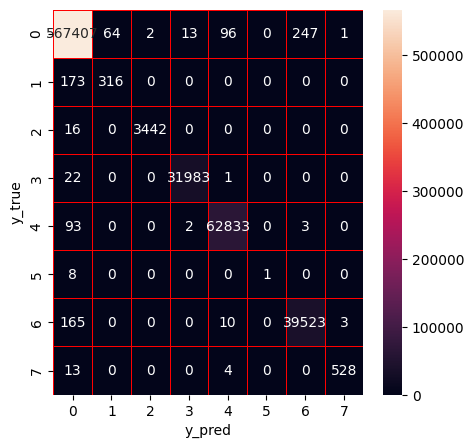

In [30]:
# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

generated data


In [12]:
generated_X = np.load('data/cic/generated_X.npy')
generated_y = np.load('data/cic/generated_y.npy')
X_train_new = pd.concat([pd.DataFrame(X_train), pd.DataFrame(generated_X)], ignore_index=True)
y_train_new = pd.concat([pd.DataFrame(y_train), pd.DataFrame(generated_y)], ignore_index=True)
y_train_new= y_train_new.values.ravel()
# X_train_new.shape

In [13]:
# Train Random Forest model

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_new, y_train_new)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# # Hyperparameter optimization of random forest
# from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# # Define the objective function
# def objective(params):
#     params = {
#         'n_estimators': int(params['n_estimators']), 
#         'max_depth': int(params['max_depth']),
#         'max_features': int(params['max_features']),
#         "min_samples_split":int(params['min_samples_split']),
#         "min_samples_leaf":int(params['min_samples_leaf']),
#         "criterion":str(params['criterion'])
#     }
#     clf = RandomForestClassifier( **params)
#     clf.fit(X_train,y_train)
#     score=clf.score(X_test,y_test)

#     return {'loss':-score, 'status': STATUS_OK }
# # Define the hyperparameter configuration space
# space = {
#     'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
#     'max_depth': hp.quniform('max_depth', 5, 50, 1),
#     "max_features":hp.quniform('max_features', 1, 20, 1),
#     "min_samples_split":hp.quniform('min_samples_split',2,11,1),
#     "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
#     "criterion":hp.choice('criterion',['gini','entropy'])
# }

# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=20)
# print("Random Forest: Hyperopt estimated optimum {}".format(best))

In [ ]:
!pip3 install xgboost
import xgboost as xgb

In [ ]:
# X = cicidsdf.drop('Label', axis=1)
# y = le.fit_transform(cicidsdf['Label'])
# # Replace infinite values with NaN
# X.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Fill NaN values with the mean of the column
# X.fillna(X.mean(), inplace=True)
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# # Split cicidsdf
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(y_train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

[0 0 0 ... 4 0 4]


In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'max_depth': 6,
    'eta': 0.3,
    'num_class': 8,  # Number of classes
    'seed': 42
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)


KeyboardInterrupt: 

In [ ]:
# Predictions
preds = bst.predict(dtest)

# Evaluate
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, preds))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds))



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# X = cicidsdf.drop('Label', axis=1)
# y = le.fit_transform(cicidsdf['Label'])
# # Replace infinite values with NaN
# X.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Fill NaN values with the mean of the column
# X.fillna(X.mean(), inplace=True)
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# # Split cicidsdf
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Make predictions
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))

## WCGAN-GP

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Embedding, multiply, BatchNormalization ,Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

In [ ]:
# # Save the data to .npy files
# np.save("x_train.npy",X_train)
# np.save("y_train.npy",y_train)
# np.save("x_test.npy",X_test)
# np.save("y_test.npy",y_test)
# X_train

array([[6.75974670e-03, 1.56666652e-06, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.08728161e-04, 1.33333321e-06, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.08728161e-04, 2.02991648e-04, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22072175e-03, 1.25405822e-03, 9.10092010e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.08728161e-04, 1.31305821e-03, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22072175e-03, 1.41666654e-07, 4.55046005e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])